┌ Warning: Multiple series with different color share a colorbar.
│ Colorbar may not reflect all series correctly.
└ @ Plots C:\Users\Golum\.julia\packages\Plots\kLeqV\src\backends\gr.jl:528
┌ Warning: Multiple series with different fill alpha share a colorbar.
│ Colorbar may not reflect all series correctly.
└ @ Plots C:\Users\Golum\.julia\packages\Plots\kLeqV\src\backends\gr.jl:528
┌ Warning: Multiple series with different color share a colorbar.
│ Colorbar may not reflect all series correctly.
└ @ Plots C:\Users\Golum\.julia\packages\Plots\kLeqV\src\backends\gr.jl:528
┌ Warning: Multiple series with different fill alpha share a colorbar.
│ Colorbar may not reflect all series correctly.
└ @ Plots C:\Users\Golum\.julia\packages\Plots\kLeqV\src\backends\gr.jl:528
┌ Warning: Multiple series with different color share a colorbar.
│ Colorbar may not reflect all series correctly.
└ @ Plots C:\Users\Golum\.julia\packages\Plots\kLeqV\src\backends\gr.jl:528
┌ Warning: Multiple series with dif

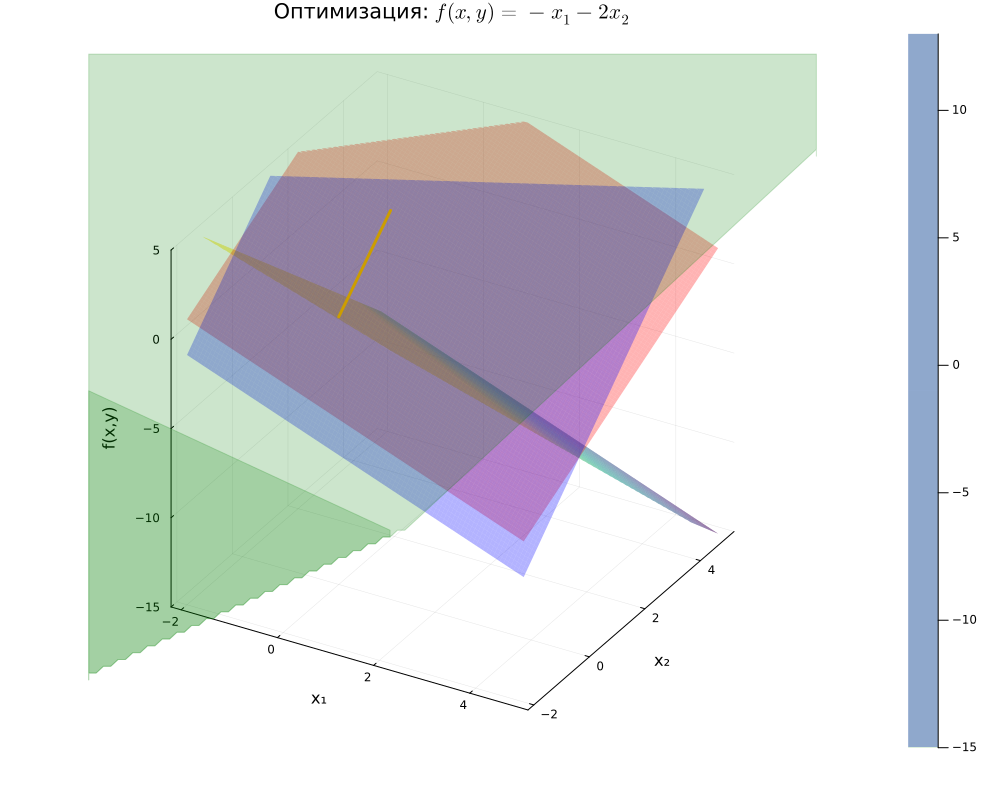

In [11]:
using Plots, LinearAlgebra

# Функция и параметры
f(x,y) = -x - 2y
x = y = range(-2, 5, length=100)
grad = [1, 2]  # антиградиент

# Ограничения (барьеры)
cons1(x,y) = -x + y + 1  # -x₁ + x₂ ≥ -1 → x₂ ≥ x₁ - 1
cons2(x,y) = 1 - x + 2y  # x₁ - 2x₂ ≤ 1 → x₂ ≥ (x₁ - 1)/2

# 1. Создаем основной 3D график
plt = plot(size=(1000, 800), title=raw"Оптимизация: $f(x,y) = -x_1 - 2x_2$",
           xlabel="x₁", ylabel="x₂", zlabel="f(x,y)", legend=:topright)

# Поверхность функции (с ограничением области)
surface!(plt, x, y, (x,y) -> cons1(x,y) ≥ 0 && cons2(x,y) ≥ 0 ? f(x,y) : NaN,
         c=:viridis, alpha=0.7, colorbar=:right)

# Визуализация ограничений (как поверхности)
surface!(plt, x, y, (x,y) -> cons1(x,y), alpha=0.3, c=:red, label="-x₁ + x₂ = -1")
surface!(plt, x, y, (x,y) -> cons2(x,y), alpha=0.3, c=:blue, label="x₁ - 2x₂ = 1")

# Антиградиент (3D стрелка)
quiver!(plt, [0], [0], [0], quiver=([grad[1]], [grad[2]], [10]), 
       color=:orange, linewidth=3, label="Антиградиент")

# Границы допустимой области (проекция на z=min)
contour!(plt, x, y, (x,y) -> cons1(x,y) ≥ 0 && cons2(x,y) ≥ 0 ? minimum(f.(x,y)) : NaN,
         levels=1, fill=true, alpha=0.2, c=:green, label="Допустимая область")

# Настройки камеры
plot!(plt, camera=(30, 30), zlims=(-15,5))